In [70]:
 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
 



In [71]:
p=pd.read_csv(r"C:\Users\hp\Desktop\kc_house_data.csv")

In [72]:
p.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [73]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [74]:
p.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [75]:
p.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values for all the dataset.

In [76]:
p.drop('date',axis=1, inplace=True)
p.drop('id',axis=1, inplace=True)
p.drop('zipcode',axis=1, inplace=True)
 

In [77]:
p.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


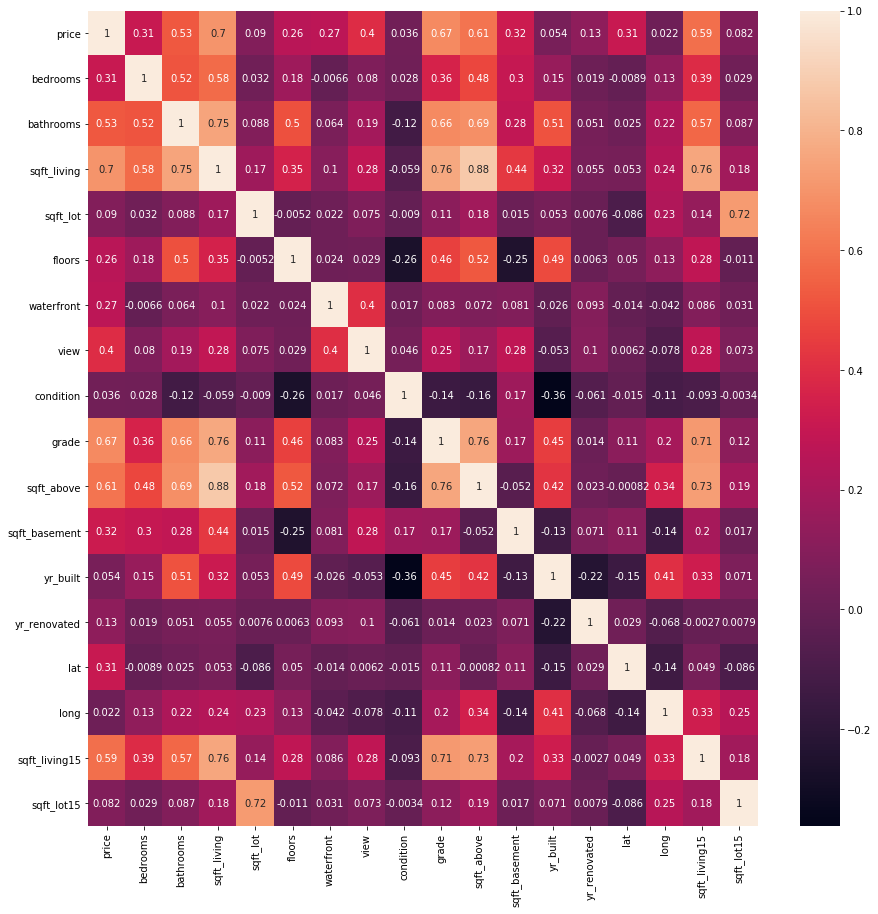

In [78]:
 plt.figure(figsize=(15,15))
sns.heatmap(p.corr(),annot=True)

In [79]:
cor=p.corr() 
cor2=abs(cor["price"])
t= cor2[cor2>0.5]
print(t)

price            1.000000
bathrooms        0.525138
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
Name: price, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x1f38894eb88>,
 'caps': [<matplotlib.lines.Line2D at 0x1f388955cc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f38894e108>],
 'medians': [<matplotlib.lines.Line2D at 0x1f388930dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f388930f08>],
 'means': []}

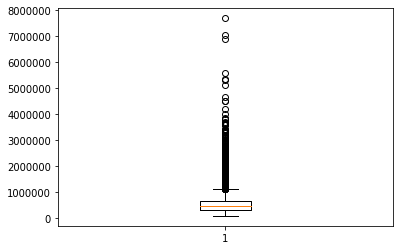

In [80]:
plt.boxplot(p['price'])

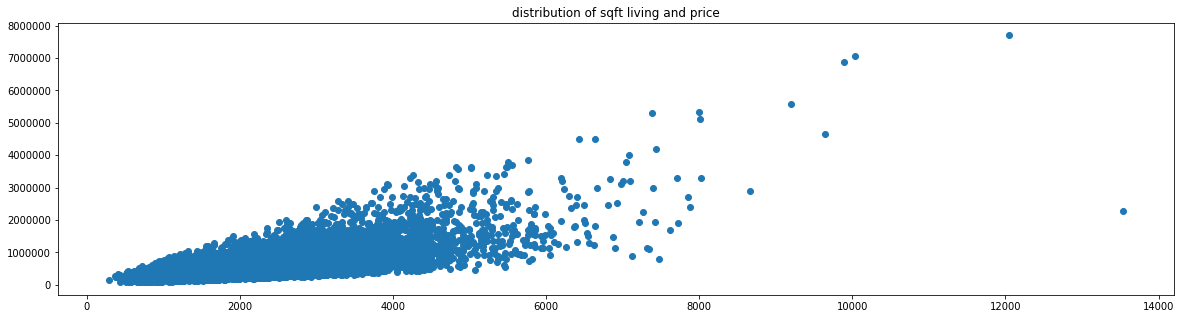

In [81]:
plt.figure(figsize=(20,5))
 
plt.title("distribution of sqft living and price")
plt.scatter(p['sqft_living'],p['price'])
 

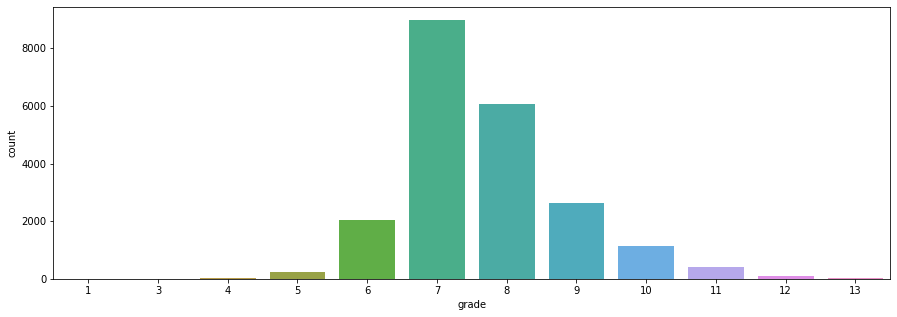

In [82]:
plt.figure(figsize=(15,5))
 
sns.countplot(data=p,x='grade')
 
 

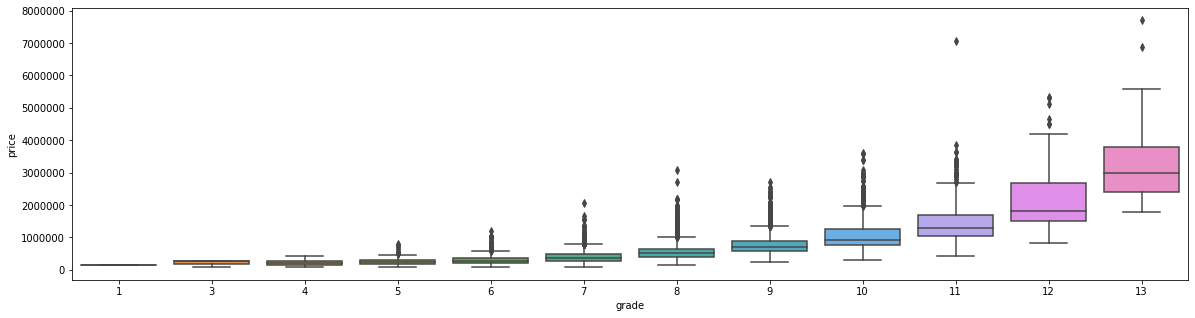

In [83]:
plt.figure(figsize=(20,5))
 
sns.boxplot(data=p,x='grade',y='price')
 

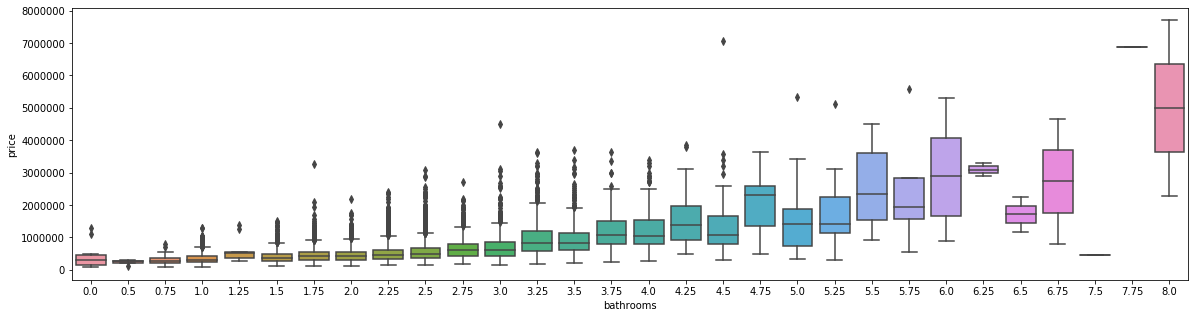

In [84]:
plt.figure(figsize=(20,5))
 
sns.boxplot(data=p,x='bathrooms',y='price')

The number of bedrooms do not seem to affect much the price. However, it seems that houses that have so many bathrooms are much more expensive.

In [85]:
p.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn .preprocessing import PolynomialFeatures 
from sklearn import metrics


In [87]:
x=p[['sqft_living']]
y=p['price']  
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)
sr=LinearRegression()
sr.fit(x_train,y_train)
predicted=sr.predict(x_test) 
print("R²= ", metrics.r2_score(y_test, predicted))
print("MSE= ", metrics.mean_squared_error(y_test, predicted))
print(sr.coef_)
print(sr.intercept_)
 
 

R²=  0.5073460545260231
MSE=  71973967322.16974
[277.36412987]
-36738.177346381824


In [88]:
x=p[['grade']]
y=p['price']  
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)
sr=LinearRegression()
sr.fit(x_train,y_train)
predicted=sr.predict(x_test) 
print("R²= ", metrics.r2_score(y_test, predicted))
print("MSE= ", metrics.mean_squared_error(y_test, predicted))
print(sr.coef_)
print(sr.intercept_)
 

R²=  0.40820979514000777
MSE=  86457216586.77571
[208897.05061241]
-1060845.6996012996


The feature sqft_living explains 40.82% of the variance of the price.

In [89]:
x=p[['bathrooms']]
y=p['price']  
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)
sr=LinearRegression()
sr.fit(x_train,y_train)
predicted=sr.predict(x_test) 
print("R²= ", metrics.r2_score(y_test, predicted))
print("MSE= ", metrics.mean_squared_error(y_test, predicted))
print(sr.coef_)
print(sr.intercept_)

R²=  0.28108352004075476
MSE=  105029649536.60196
[246523.89187686]
18632.78984939243


In [90]:
x=p[[  'bathrooms', 'sqft_living' , 'grade' ]]
y=p['price']  
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)
sr=LinearRegression()
sr.fit(x_train,y_train)
predicted=sr.predict(x_test) 
print("R²= ", metrics.r2_score(y_test, predicted))
print("MSE= ", metrics.mean_squared_error(y_test, predicted))
print(sr.coef_)
print(sr.intercept_)

R²=  0.5305320858336191
MSE=  68586618707.59973
[-38937.09704369    194.21265659 109877.64768095]
-623534.3225133604


In [91]:
x=p.drop("price", axis=1)
y=p['price']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)
sr=LinearRegression()
sr.fit(x_train,y_train)
predicted=sr.predict(x_test) 
print("R²= ", metrics.r2_score(y_test, predicted))
print("MSE= ", metrics.mean_squared_error(y_test, predicted))
print(sr.coef_)
print(sr.intercept_)

R²=  0.6973676152179044
MSE=  44212887307.704315
[-3.29852290e+04  3.96239427e+04  1.01905164e+02  8.27228836e-02
 -3.03937143e+03  5.63682708e+05  4.98891434e+04  3.18818442e+04
  1.01501064e+05  6.82127571e+01  3.36924067e+01 -2.36395767e+03
  1.63544124e+01  5.55651531e+05 -1.20347155e+05  3.27181396e+01
 -3.45729775e-01]
-37213689.2600116


In [92]:
x=p[[  'sqft_living' ]]
y=p['price'] 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)
xtr2 =poly.fit_transform(x_train)
xtst2=poly.fit_transform(x_test)
lg.fit(xtr2 , y_train)
predicted=lg.predict(xtst2)

print("R²= ", metrics.r2_score(y_test, predicted))
print("MSE= ", metrics.mean_squared_error(y_test, predicted))
print(lg.coef_)
print(lg.intercept_)

R²=  0.5855591668874294
MSE=  60547472020.586075
[0.00000000e+00 9.31721994e+01 3.37454932e-02]
172106.56010560453


when we used the polynomial version of the model with only one feature (sqft living), the model captures 58.55% of the variance of the price which is higher than the R²  in the linear model (50.73%).

In [93]:
x=p[['grade' ]]
y=p['price']  
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)
xtr2 =poly.fit_transform(x_train)
xtst2=poly.fit_transform(x_test)
lg.fit(xtr2 , y_train)
predicted=lg.predict(xtst2)

print("R²= ", metrics.r2_score(y_test, predicted))
print("MSE= ", metrics.mean_squared_error(y_test, predicted))
print(lg.coef_)
print(lg.intercept_)
 

R²=  0.47995111094793075
MSE=  75976214319.26894
[      0.         -469221.61789175   41703.50888524]
1629270.0543399942


when we used the polynomial version of the model with only one feature (grade), the model captures 47.99% of the variance of the price

In [94]:
x=p[['bathrooms' ]]
y=p['price']  
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)
xtr2 =poly.fit_transform(x_train)
xtst2=poly.fit_transform(x_test)
lg.fit(xtr2 , y_train)
predicted=lg.predict(xtst2)

print("R²= ", metrics.r2_score(y_test, predicted))
print("MSE= ", metrics.mean_squared_error(y_test, predicted))
print(lg.coef_)
print(lg.intercept_)

R²=  0.37763318747759245
MSE=  90924286790.79121
[      0.         -119645.63835595   79106.31410561]
392152.2546767428


In [95]:
x=p[['bathrooms','grade','sqft_living' ]]
y= p['price'] 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)
xtr2 =poly.fit_transform(x_train)
xtst2=poly.fit_transform(x_test)
lg.fit(xtr2 , y_train)
predicted=lg.predict(xtst2)

print("R²= ", metrics.r2_score(y_test, predicted))
print("MSE= ", metrics.mean_squared_error(y_test, predicted))
print(lg.coef_)
print(lg.intercept_)

R²=  0.6116246437957353
MSE=  56739452617.777336
[ 0.00000000e+00 -1.49543552e+05 -3.10384177e+03 -2.18983304e+02
  2.27300197e+04  7.60564049e+03 -9.48980839e+00 -1.34892380e+03
  5.16143365e+01 -5.68849947e-03]
384641.5305147944


In the polynomial model, when the three features  were added, the model explains 61.16% of the variance of the price. Thus, this developed version of the model has a high explanatory power of the price.

In [96]:
x=p.drop("price", axis=1)
y= p['price'] 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)
xtr2 =poly.fit_transform(x_train)
xtst2=poly.fit_transform(x_test)
lg.fit(xtr2 , y_train)
predicted=lg.predict(xtst2)

print("R²= ", metrics.r2_score(y_test, predicted))
print("MSE= ", metrics.mean_squared_error(y_test, predicted))
print(lg.coef_)
print(lg.intercept_)

R²=  0.807772166599668
MSE=  28083404033.750492
[ 2.55034418e+03  1.77988359e+07 -6.35095573e+06 -1.42214975e+04
  1.61049750e+02  9.45485917e+06  3.67392116e+07  4.28029514e+06
  2.00025808e+06 -2.73658383e+07 -2.81713911e+04 -1.51237461e+04
  7.43227188e+05  1.22871498e+04  1.13293265e+08  9.39750726e+06
 -5.86157955e+03  2.35676424e+02  1.13192770e+03  8.37897105e+02
 -1.01126186e+01  7.25785838e-02  2.18655120e+04 -6.57107441e+04
  4.73138087e+03 -3.62029466e+03  2.85032677e+03 -1.78574937e+01
 -1.14792021e+01 -5.36107661e+02  2.46525670e+01 -3.58939677e+04
  1.23164498e+05  5.44831457e+00  6.85190399e-02 -9.36048138e+03
  1.20061325e+01 -5.80261055e-01 -2.25149024e+04  1.06341071e+05
  7.22117884e+02 -1.47130833e+04  7.85505747e+03  1.48493839e+01
  1.10894456e+00  2.95405407e+02 -2.62181607e+01  4.23345574e+04
 -3.11486335e+04 -7.54433074e+00  5.28748572e-01 -2.91005431e+03
 -6.00168073e+03 -2.49057049e+01  7.61108920e+01 -4.53268112e+00
  8.89032678e+00  2.42423396e+01  8.794555

In [97]:
a=poly.fit_transform(x_test)
b=lg.predict(a)
b[1]
 

643184.1291766167

In [98]:
y_test 

957       323000.0
14143     690000.0
19452     142000.0
20510     560000.0
18354     545000.0
           ...    
5349      386591.0
11082     344950.0
4413     1150000.0
17461     622200.0
9848      450000.0
Name: price, Length: 4323, dtype: float64

In [99]:
from scipy import stats
zscore=np.abs(stats.zscore(p))
print(zscore)

[[0.86671733 0.39873715 1.44746357 ... 0.30607896 0.9433552  0.26071541]
 [0.00568792 0.39873715 0.1756067  ... 0.74634143 0.43268619 0.18786773]
 [0.98084935 1.47395936 1.44746357 ... 0.13565477 1.07013975 0.17237524]
 ...
 [0.37586519 1.47395936 1.77207762 ... 0.60432128 1.41025258 0.39414129]
 [0.38158814 0.39873715 0.50022075 ... 1.02891048 0.8412214  0.42051149]
 [0.58588173 1.47395936 1.77207762 ... 0.60432128 1.41025258 0.41794772]]


In [109]:
p_clean=p[(zscore<=3).all(axis=1)]

In [110]:
p_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [111]:
x=p_clean[[  'bathrooms', 'sqft_living' , 'grade' ]]
y=p_clean['price']  
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)
sr=LinearRegression()
sr.fit(x_train,y_train)
predicted=sr.predict(x_test) 
print("R²= ", metrics.r2_score(y_test, predicted))
print("MSE= ", metrics.mean_squared_error(y_test, predicted))
print(sr.coef_)
print(sr.intercept_)

R²=  0.4849244361083207
MSE=  29241306460.03266
[-31094.80496682    124.39925627  91279.03601709]
-386063.0916247051


In [112]:
x=p_clean[['bathrooms','grade','sqft_living' ]]
y= p_clean['price'] 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)
xtr2 =poly.fit_transform(x_train)
xtst2=poly.fit_transform(x_test)
lg.fit(xtr2 , y_train)
predicted=lg.predict(xtst2)

print("R²= ", metrics.r2_score(y_test, predicted))
print("MSE= ", metrics.mean_squared_error(y_test, predicted))
print(lg.coef_)
print(lg.intercept_)

R²=  0.49875266117807937
MSE=  28456265593.391678
[ 0.00000000e+00 -1.44754056e+05 -1.79612582e+04  9.01421656e+01
  3.62611582e+04 -4.22841646e+03  1.32811490e+00  7.05327022e+03
  4.13811630e+00 -1.48810394e-03]
164445.04501432006


 In the polynomial model, the value of R² in p_clean data set is so close to that of p. The prediction power of the model is not so high!

In [121]:
x=p_clean.drop("price", axis=1)
y= p_clean['price'] 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)
lg=LinearRegression()
 
lg.fit(x_train , y_train)
predicted=lg.predict(x_test)

print("R²= ", metrics.r2_score(y_test, predicted))
print("MSE= ", metrics.mean_squared_error(y_test, predicted))
print(lg.coef_)
print(lg.intercept_)

R²=  0.6849480131869068
MSE=  17885786752.60399
[-1.28062328e+04  2.95459918e+04  6.18513151e+01  3.21835569e-01
  2.72513087e+04  2.58478394e-09  3.53693333e+04  3.05151743e+04
  8.54628373e+04  3.50320612e+01  2.68192539e+01 -2.11754390e+03
  0.00000000e+00  5.39365716e+05 -3.49279944e+04  4.69039210e+01
 -1.37012334e+00]
-26341813.322945446


In [118]:
x=p_clean.drop("price", axis=1)
y= p_clean['price'] 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)
xtr2 =poly.fit_transform(x_train)
xtst2=poly.fit_transform(x_test)
lg.fit(xtr2 , y_train)
predicted=lg.predict(xtst2)

print("R²= ", metrics.r2_score(y_test, predicted))
print("MSE= ", metrics.mean_squared_error(y_test, predicted))
print(lg.coef_)
print(lg.intercept_)

R²=  0.7558681567661725
MSE=  13859585942.528389
[ 1.40099185e+03  7.68547086e+06 -6.62595187e+06 -1.16954496e+04
  3.73118122e+02 -1.23335349e+07 -4.90305558e+02  4.21644065e+06
  4.41527891e+06 -2.00455460e+07 -3.52053175e+03 -8.81993312e+03
  6.40318136e+05 -3.01689770e+02  1.34582710e+08  4.91541592e+07
  1.20627106e+02 -8.02969947e+01 -6.01087109e+02  2.29120747e+02
 -7.99466259e+00  2.47626902e-01  5.34633802e+03 -6.90908183e-01
  4.00213074e+03 -1.70963053e+03  6.75664499e+03 -1.10470732e+00
 -5.96316814e+00 -4.15900614e+02  1.84627812e-01 -2.37998951e+04
  4.73971032e+04  1.21700540e+01 -1.36337275e-01  2.17840616e+02
  1.90932448e+01 -1.88709968e-01 -2.83100094e+04  6.44096178e-03
 -7.00529412e+03 -9.22822170e+03  1.25647097e+04  1.97107344e+01
 -9.39168663e-01 -2.37208415e+01  6.13820985e-03  5.02749181e+04
 -3.48081978e+04 -2.38107173e+01 -2.15987104e-01  1.06938709e+02
 -1.96671094e+01  1.80461227e+01  3.47720060e-03 -5.23582617e+00
  6.35669812e+00  1.15741337e+01 -9.97721